# Jamie's Phase 1 Project Work!
### hooray 

### also side note... highly recommend using command+F to navigate this sucker

In [ ]:
# imports
import pandas as pd

### CPI package sourced from https://github.com/datadesk/cpi#:~:text=Working%20with%20Python,the%20Bureau%20of%20Labor%20Statistics

In [ ]:
import cpi
cpi.update() # run to make sure current Consumer Price Index is being used in calculations

In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [261]:
imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [159]:
rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [106]:
# kaggle_movies = pd.read_csv('movies_metadata.csv', dtype={'genres':list}) == not working

In [35]:
# Kaggle columns
import ast
# kaggle_movies['genres'] = kaggle_movies['genres'].apply(lambda x: ast.literal_eval(x))
# kaggle_movies['genres']



In [7]:
# get list of all columns in files
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

# Cleaning tnMovieBudgets

In [160]:
tnMovieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [161]:
# looking for more efficient way to do this
tnMovieBudgets['worldwide_gross'] = tnMovieBudgets['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['domestic_gross'] = tnMovieBudgets['domestic_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['production_budget'] = tnMovieBudgets['production_budget'].apply(lambda x: int(x.replace('$','').replace(',','')))
# tnMovieBudgets[tnMovieBudgets['worldwide_gross']=='$0'] = 'None'
# try applymap

# don't have to run again, but why??

In [162]:
tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [ ]:
# adding 'month_released' and year released column
tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year'] = tnMovieBudgets['year'].apply(lambda x: int(x[:4]))

#oopsie gotta drop some stuff
tnMovieBudgets.drop(labels='year_released', axis=1, inplace=True)

In [180]:
tnMovieBudgets.drop(labels='release_date', axis=1, inplace=True)

In [181]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year
0,1,Avatar,425000000,760507625,2776345279,12,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


# Cleaning bomMovieGross

In [164]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [165]:
bomMovieGross['foreign_gross'].fillna(value=0, inplace=True)

In [166]:
bomMovieGross['foreign_gross'] = bomMovieGross['foreign_gross'].apply(lambda x: float(str(x).replace(',','')))


# Adjusting all money values for inflation using CPI package

In [186]:
# bomMovieGross

bomMovieGross['domestic_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

bomMovieGross['foreign_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.foreign_gross, x.year), axis=1)

In [187]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,Toy Story 3,BV,415000000.0,652000000.0,2010,4.779020e+08,7.508244e+08
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,3.848551e+08,7.960811e+08
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,3.408651e+08,7.649887e+08
3,Inception,WB,292600000.0,535700000.0,2010,3.369497e+08,6.168967e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2.748800e+08,5.917924e+08


In [192]:
bomMovieGross['year'].dtype

dtype('int64')

In [195]:
cpi.get(2018)

251.107

In [197]:
# tnMovieBudgets
tnMovieYA = tnMovieBudgets[tnMovieBudgets['year']<2019]

tnMovieBudgets['domestic_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

tnMovieBudgets['worldwide_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)


In [198]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,8.901438e+08,3.249601e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.691077e+08,1.167310e+09
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,NaN,NaN
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,4.862925e+08,1.486419e+09
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.353292e+08,1.348882e+09


In [200]:
# Fill domestic/worldwide adjusted NaNs with original price-- the CPI adjuster does not adjust
# for any years after 2018.

tnMovieBudgets['domestic_adj'].fillna(value=tnMovieBudgets['domestic_gross'], inplace=True)


,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,8.901438e+08,3.249601e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.691077e+08,1.167310e+09
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,4.276235e+07,NaN
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,4.862925e+08,1.486419e+09
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.353292e+08,1.348882e+09


In [201]:
tnMovieBudgets['worldwide_adj'].fillna(value=tnMovieBudgets['worldwide_gross'], inplace=True)

# Cleaning tmdbMovies

In [8]:
tmdbMovies.drop('Unnamed: 0', axis=1, inplace=True)
# don't run again

In [13]:
#CHECK IF THERE ARE DUPLICATE MOVIES DUDE
tmdbMovies['id'].value_counts()

292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64

# Cleaning IMDB Data

In [ ]:
imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,

In [116]:
imdbNameBasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [ ]:
# Split primary_profession and known_for_titles lists
imdbNameBasics.fillna(value='None', inplace=True)
imdbNameBasics[['known_for_titles','primary_profession']] = imdbNameBasics[['known_for_titles','primary_profession']].applymap(lambda x: x.split(','))

In [224]:
imdbNameBasics['known_for_titles'][0]

['tt0837562', 'tt2398241', 'tt0844471', 'tt0118553']

In [108]:
imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [228]:
imdbTitleBasics['primary_title'].value_counts()

Home                                 24
Broken                               20
The Return                           20
Alone                                16
Homecoming                           16
                                     ..
A Queer Country                       1
The Humpback Whales of Cape Verde     1
Caur Adatu                            1
Thawathosamat                         1
Burra katha                           1
Name: primary_title, Length: 136071, dtype: int64

In [238]:
# may use to create list of all possible titles when joining certain dataframes...
imdbTitleBasics['title_equal'] = (imdbTitleBasics['original_title'] == imdbTitleBasics['primary_title'])

imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[action, crime, drama]",True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[biography, drama]",False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[drama],True
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[comedy, drama]",True
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[comedy, drama, fantasy]",False


In [237]:
imdbTitleBasics['title_equal'].value_counts()

True     131640
False     14504
Name: title_equal, dtype: int64

In [231]:
imdbTitleBasics['genres'].fillna(value='None', inplace=True)
# already ran

In [232]:
# Split list of genres
imdbTitleBasics['genres'] = imdbTitleBasics['genres'].apply(lambda x: x.lower().split(','))

In [216]:
imdb_orig_titles = imdbTitleAkas[imdbTitleAkas['is_original_title']==1.0]

In [239]:
imdbTitleAkas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [281]:
# rename title_id to tconst to allow for appending
imdbTitleAkas.rename(mapper={'title_id' : 'tconst'}, axis=1, inplace=True)

#already ran

In [282]:
imdbTitleAkas.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [227]:
imdbTitleAkas['region'].value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
VC         1
AI         1
EH         1
KN         1
TM         1
Name: region, Length: 213, dtype: int64

In [110]:
imdbTitleCrew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [111]:
imdbTitlePrincipals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [112]:
imdbTitleRatings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Time to smush these Data frames together along the **tconst** column:

In [277]:
imdb_dfs = [imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]

In [278]:
len(imdb_dfs)

5

In [334]:
# maybe clean this up later with a for loop?
imdb_master = pd.merge(
                    pd.merge(
                            pd.merge(
                                    pd.merge(
                                        imdb_dfs[0], imdb_dfs[1], on='tconst', how = 'outer'
                                        ), 
                                imdb_dfs[2], on='tconst', how = 'outer'
                                ), 
                        imdb_dfs[3], on='tconst', how = 'outer', suffixes=('_akas', '_princ')
                        ),
                  imdb_dfs[4], on='tconst', how = 'outer')

In [335]:
len(imdb_master)

2975785

In [336]:
# remove any movies with start year after 2021
imdb_master = imdb_master.loc[imdb_master['start_year'] <= 2021]

In [321]:
len(imdb_master)

2975436

In [316]:
# range of movie start years
sorted(imdb_master['start_year'].value_counts().index)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [323]:
# imdb has the most data for the year 2016

imdb_master['start_year'].value_counts()

2016    341605
2017    338241
2014    333687
2015    330226
2013    325704
2018    304196
2012    301721
2011    288765
2010    274925
2019    125295
2020      9951
2021      1120
Name: start_year, dtype: int64

In [346]:
imdb_master[210:240]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,is_original_title,directors,writers,ordering_princ,nconst,category,job,characters,averagerating,numvotes
20831,tt0486622,Making Change,Making Change,2012,94.0,Drama,1.0,Making Change,US,NaN,...,0.0,nm2082917,nm2082917,10.0,nm1861026,production_designer,NaN,NaN,6.7,59.0
20841,tt0490075,Aftermath,Aftermath,2013,84.0,"Crime,Thriller",1.0,Aftermath,US,NaN,...,0.0,nm1720364,nm1720364,10.0,nm1978231,cinematographer,director of photography,NaN,5.1,271.0
20851,tt0490199,PrimeMates,PrimeMates,2010,82.0,"Comedy,Drama",1.0,PrimeMates,US,NaN,...,0.0,nm1837754,nm1837754,10.0,nm0469769,production_designer,NaN,NaN,6.7,63.0
20861,tt0490215,Silence,Silence,2016,161.0,"Adventure,Drama,History",10.0,Šutnja,HR,NaN,...,0.0,nm0000217,"nm0168379,nm0000217,nm0256870",10.0,nm0256542,producer,producer,NaN,7.2,85242.0
21141,tt0490236,The Invited,The Invited,2010,95.0,"Horror,Thriller",1.0,The Invited,NaN,NaN,...,1.0,nm1351194,"nm1371447,nm1351194",10.0,nm0930392,composer,NaN,NaN,4.2,240.0
21181,tt0490847,Double Tap,Double Tap,2011,100.0,"Action,Crime,Drama",1.0,Double Tap,US,NaN,...,0.0,nm1141083,"nm1141083,nm0140486",10.0,nm2656173,production_designer,NaN,NaN,5.2,52.0
21191,tt0491152,Something Borrowed,Something Borrowed,2011,112.0,"Comedy,Drama,Romance",10.0,Something Borrowed,US,NaN,...,0.0,nm0339004,"nm1646565,nm2808946",10.0,nm0523892,producer,producer,NaN,5.9,54314.0
21481,tt0491175,Suburbicon,Suburbicon,2017,105.0,"Comedy,Crime,Drama",10.0,Bienvenue à Suburbicon,CA,fr,...,0.0,nm0000123,"nm0001054,nm0001053,nm0000123,nm0381416",10.0,nm0006035,composer,NaN,NaN,5.6,31294.0
21721,tt0491203,Tulip Fever,Tulip Fever,2017,105.0,"Drama,History,Romance",10.0,Tulpanfeber,SE,NaN,...,0.0,nm0149491,"nm0595738,nm0001779",10.0,nm0000384,composer,NaN,NaN,6.2,15037.0
21961,tt0492389,Furry Vengeance,Furry Vengeance,2010,92.0,"Comedy,Family",10.0,Zemsta futrzaków,PL,NaN,...,0.0,nm0474955,"nm1678479,nm1404095",10.0,nm0790481,composer,NaN,NaN,3.8,14700.0


In [324]:
imdb_master.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'ordering_akas', 'title', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'directors',
       'writers', 'ordering_princ', 'nconst', 'category', 'job', 'characters',
       'averagerating', 'numvotes'],
      dtype='object')

### Grouping IMDB master

In [325]:
# By movie title
def get_perc(grp_obj): # saw this on stack overflow, don't understand it
    gr_size = grp_obj.size()
    return gr_size / gr_size.sum()

grouped_titles = imdb_master.groupby(by=['tconst', 'title']).mean()
grouped_titles.head()

start_year  runtime_minutes  \
tconst    title                                                          
tt0063540 Sangharsh                              2013            175.0   
          Sungharsh                              2013            175.0   
          Sunghursh                              2013            175.0   
tt0066787 Ashad Ka Ek Din                        2019            114.0   
          One Day Before the Rainy Season        2019            114.0   

                                           ordering_akas  is_original_title  \
tconst    title                                                               
tt0063540 Sangharsh                                  1.0           0.000000   
          Sungharsh                                  5.0           0.000000   
          Sunghursh                                  3.0           0.333333   
tt0066787 Ashad Ka Ek Din                            3.0           0.500000   
          One Day Before the Rainy Season            1.0           0.000000   

                                           ordering_princ  averagerating  \
tconst    title                                                            
tt0063540 Sangharsh                                   5.5            7.0   
          Sungharsh                                   5.5            7.0   
          Sunghursh                                   5.5            7.0   
tt0066787 Ashad Ka Ek Din                             4.0            7.2   
          One Day Before the Rainy Season             4.0            7.2   

                                           numvotes  
tconst    title                                      
tt0063540 Sangharsh                            77.0  
          Sungharsh                            77.0  
          Sunghursh                            77.0  
tt0066787 Ashad Ka Ek Din                      43.0  
          One Day Before the Rainy Season      43.0

In [353]:
# By year
grouped_years = imdb_master.groupby(by=['start_year', 'primary_title']).mean()
grouped_years.head()

runtime_minutes  ordering_akas  \
start_year primary_title                                                      
2010       !Women Art Revolution                        83.0            1.0   
           #unibrennt                                   85.0            1.0   
           '70 Remembering a Revolution                114.0            1.0   
           'Master Harold' ... And the Boys             87.0            1.0   
           (No) Laughing Matter                         55.0            1.0   

                                             is_original_title  \
start_year primary_title                                         
2010       !Women Art Revolution                           0.0   
           #unibrennt                                      0.0   
           '70 Remembering a Revolution                    0.0   
           'Master Harold' ... And the Boys                1.0   
           (No) Laughing Matter                            0.0   

                                             ordering_princ  averagerating  \
start_year primary_title                                                     
2010       !Women Art Revolution                        1.0            6.9   
           #unibrennt                                   1.0            NaN   
           '70 Remembering a Revolution                10.0            NaN   
           'Master Harold' ... And the Boys            10.0            5.8   
           (No) Laughing Matter                        10.0            7.7   

                                             numvotes  
start_year primary_title                               
2010       !Women Art Revolution                196.0  
           #unibrennt                             NaN  
           '70 Remembering a Revolution           NaN  
           'Master Harold' ... And the Boys     442.0  
           (No) Laughing Matter                  10.0

In [352]:
# By director
grouped_directors = imdb_master.groupby(by=['directors', 'primary_title']).mean()
grouped_directors.head()

start_year  runtime_minutes  \
directors primary_title                                             
nm0000080 The Other Side of the Wind      2018.0            122.0   
nm0000095 A Rainy Day in New York         2019.0             95.0   
          Blue Jasmine                    2013.0             98.0   
          Café Society                    2016.0             96.0   
          Irrational Man                  2015.0             95.0   

                                      ordering_akas  is_original_title  \
directors primary_title                                                  
nm0000080 The Other Side of the Wind           10.0                0.0   
nm0000095 A Rainy Day in New York               1.0                0.0   
          Blue Jasmine                         10.0                0.0   
          Café Society                         10.0                0.0   
          Irrational Man                       10.0                0.0   

                                      ordering_princ  averagerating  numvotes  
directors primary_title                                                        
nm0000080 The Other Side of the Wind            10.0            6.9    4517.0  
nm0000095 A Rainy Day in New York                1.0            NaN       NaN  
          Blue Jasmine                          10.0            7.3  179453.0  
          Café Society                          10.0            6.6   62466.0  
          Irrational Man                        10.0            6.6   50303.0

In [355]:
# By region
grouped_regions = imdb_master.groupby(by=['region', 'primary_title']).mean()
grouped_regions.head()

start_year  runtime_minutes  \
region primary_title                                                         
AD     73'                                         2016.0              NaN   
       Impacto                                     2017.0              NaN   
AE     4th G - The Ground Level                    2015.0              NaN   
       A Tale of Shadows                           2017.0            107.0   
       A Tale of Water, Palm Trees and Family      2015.0            162.0   

                                               ordering_akas  \
region primary_title                                           
AD     73'                                               1.0   
       Impacto                                           1.0   
AE     4th G - The Ground Level                          1.0   
       A Tale of Shadows                                 1.0   
       A Tale of Water, Palm Trees and Family            1.0   

                                               is_original_title  \
region primary_title                                               
AD     73'                                                   0.0   
       Impacto                                               0.0   
AE     4th G - The Ground Level                              0.0   
       A Tale of Shadows                                     0.0   
       A Tale of Water, Palm Trees and Family                0.0   

                                               ordering_princ  averagerating  \
region primary_title                                                           
AD     73'                                               10.0            NaN   
       Impacto                                            1.0            7.9   
AE     4th G - The Ground Level                          10.0            NaN   
       A Tale of Shadows                                 10.0            6.1   
       A Tale of Water, Palm Trees and Family             1.0            NaN   

                                               numvotes  
region primary_title                                     
AD     73'                                          NaN  
       Impacto                                     36.0  
AE     4th G - The Ground Level                     NaN  
       A Tale of Shadows                          132.0  
       A Tale of Water, Palm Trees and Family       NaN

In [363]:
# by actor
actors = imdb_master[(imdb_master['category']=='actor') | (imdb_master['category']=='actress')]
grouped_actors = actors.groupby(by=['nconst', 'primary_title']).mean()
grouped_actors.head()

,,start_year,runtime_minutes,ordering_akas,is_original_title,ordering_princ,averagerating,numvotes
nconst,primary_title,,,,,,,
nm0000093,By the Sea,2015.0,122.0,10.0,0.0,1.0,5.3,16206.0
nm0000096,The Artist's Garden: American Impressionism,2017.0,90.0,1.0,0.0,1.0,6.8,9.0
nm0000101,"Flip, Flop, and Fly, 40 Years of the Downchild Blues Band",2010.0,NaN,1.0,0.0,1.0,7.5,13.0
nm0000102,The Big Green,2014.0,32.0,1.0,0.0,1.0,NaN,NaN
nm0000110,Branagh Theatre Live: The Entertainer,2016.0,NaN,1.0,0.0,1.0,7.1,57.0


In [327]:
imdb_master['start_year'].value_counts()

2016    341605
2017    338241
2014    333687
2015    330226
2013    325704
2018    304196
2012    301721
2011    288765
2010    274925
2019    125295
2020      9951
2021      1120
Name: start_year, dtype: int64

In [329]:
# Cleaning genres column

imdb_master['genres'].fillna(value='None', inplace=True)
imdb_master['genres'] = imdb_master['genres'].apply(lambda x: x.split(','))

In [347]:
imdb_master.drop_duplicates(subset=['tconst'], inplace=True)

In [348]:
imdb_master[250:260]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,is_original_title,directors,writers,ordering_princ,nconst,category,job,characters,averagerating,numvotes
25212,tt0775440,Cell,Cell,2016,98.0,"Action,Drama,Horror",10.0,Cell,US,NaN,...,0.0,nm0931095,"nm0000175,nm2085654",10.0,nm0764552,producer,producer,NaN,4.3,21968.0
25442,tt0775461,The Rain Fairy,Destová víla,2010,100.0,"Family,Fantasy",1.0,Deszczowa wrózka,PL,NaN,...,0.0,nm0162166,"nm0162166,nm1190447,nm0832627",10.0,nm2204816,editor,NaN,NaN,5.4,70.0
25492,tt0775489,The Illusionist,L'illusionniste,2010,80.0,"Animation,Drama",10.0,The Illusionist,GB,NaN,...,0.0,nm0158984,"nm0158984,nm0004244",1.0,nm0232357,actor,NaN,"[""The Illusionist"",""French Cinema Manager""]",7.5,31734.0
25716,tt0775543,Night Catches Us,Night Catches Us,2010,90.0,"Drama,Romance",1.0,A Noite que nos Domina,BR,NaN,...,0.0,nm0358184,nm0358184,10.0,nm0876511,cinematographer,NaN,NaN,6.3,1390.0
25786,tt0780504,Drive,Drive,2011,100.0,"Crime,Drama",10.0,Drive: Живот на скорост,BG,bg,...,0.0,nm0716347,"nm0024925,nm2201245",10.0,nm0686887,producer,producer,NaN,7.8,521495.0
26076,tt0780548,Kid Cannabis,Kid Cannabis,2014,110.0,"Biography,Comedy,Crime",1.0,Kid Cannabis,NaN,NaN,...,1.0,nm0007082,"nm0007082,nm5151554",10.0,nm2264155,composer,NaN,NaN,6.4,8924.0
26126,tt0780625,Santorini Blue,Santorini Blue,2013,90.0,"Comedy,Drama",1.0,Santorini Blue,NaN,NaN,...,1.0,nm0659335,"nm1255825,nm0659335",1.0,nm1255825,actress,NaN,"[""Alexandra Ronda""]",4.6,124.0
26158,tt0780645,War of the Dead,War of the Dead,2011,86.0,"Action,Adventure,Horror",1.0,Война Стоуна,RU,NaN,...,0.0,nm1458855,"nm1458855,nm0693228",10.0,nm1811944,cinematographer,NaN,NaN,4.1,2378.0
26228,tt0780653,The Wolfman,The Wolfman,2010,103.0,"Drama,Fantasy,Horror",10.0,El hombre lobo,VE,NaN,...,0.0,nm0002653,"nm0001825,nm0783100,nm0802561",10.0,nm0835959,producer,producer,NaN,5.8,97873.0
26598,tt0781441,Escalade,Escalade,2011,80.0,Thriller,1.0,Escalade,NaN,NaN,...,1.0,nm0798821,"nm0713678,nm0798821",1.0,nm0560962,actress,NaN,"[""Alice Nabat""]",4.5,43.0


# Graphs

Text(0, 0.5, 'Average Domestic Gross (Billions?)')

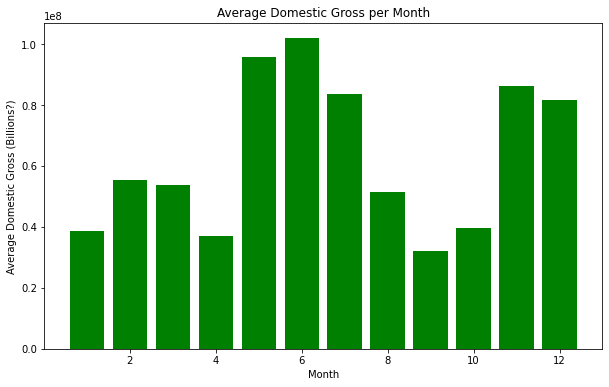

In [203]:
# comparing month released to mean DOMESTIC gross (using domestic_adj)
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_dom_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['domestic_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses, color='green')   
ax.set_title('Average Domestic Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Billions?)')

In [88]:
# comparing mean gross without zeros
tnMovies_noz = tnMovieBudgets.replace(0, np.NaN)
tnMovies_noz

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month_released,year_released
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,NaN,NaN,12,2018
5778,79,1999-04-02,Following,6000,48482.0,2.404950e+05,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338.0,1.338000e+03,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,NaN,NaN,9,2015


In [205]:
# month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
#mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_adj'].mean(skipna=True) for i in range(1,13)]                                                                                               
#ax.bar(x, mean_dom_grosses1, color='indigo')   
#ax.set_title('Average Domestic Gross per Month, without outliers')
#ax.set_xlabel('Month')
#ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

# ***this graph of means have the same values as the other, but why?***
# may want to convert months to their names

Text(0, 0.5, 'Average Worldwide Gross (Billions)')

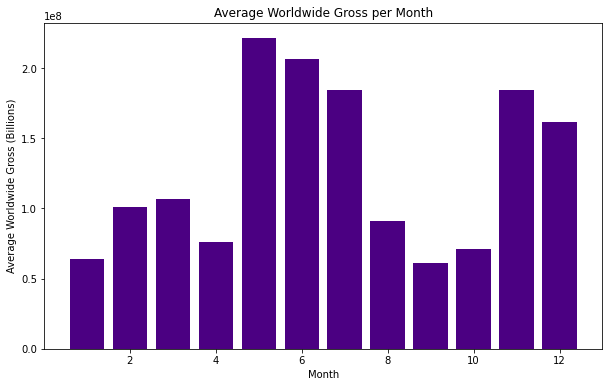

In [208]:
# comparing month released to mean WORLDWIDE gross
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_ww_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['worldwide_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(months, mean_ww_grosses, color='indigo')   
ax.set_title('Average Worldwide Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Worldwide Gross (Billions)')

# change y labels to be clearer

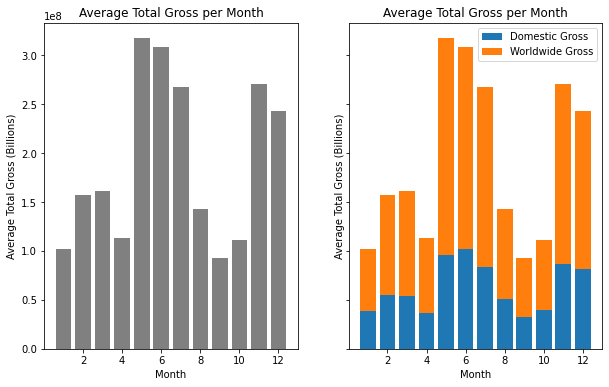

In [367]:
# comparing month released to mean WORLDWIDE + DOMESTIC, 2 plots

# create new column 'total gross'
tnMovieBudgets['total_gross'] = tnMovieBudgets['worldwide_adj'] + tnMovieBudgets['domestic_adj']

month_avg, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,6))

# x and y values
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

# setting up the graph 1
ax1.bar(months, mean_total_grosses, color='grey')   
ax1.set_title('Average Total Gross per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Gross (Billions)')

# setting up graph 2
p1 = ax2.bar(months, mean_dom_grosses)   
p2 = ax2.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax2.set_title('Average Total Gross per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Total Gross (Billions)')

ax2.legend((p1[0], p2[0]), ('Domestic Gross', 'Worldwide Gross'))

plt.show()

# may want to relabel xticks

In [ ]:
# comparing month released to mean gross per genre

month_avg, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,6))

# x and y values
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

# setting up the graph 1
ax1.bar(months, mean_total_grosses, color='grey')   
ax1.set_title('Average Total Gross per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Gross (Billions)')

# setting up graph 2
p1 = ax2.bar(months, mean_dom_grosses)   
p2 = ax2.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax2.set_title('Average Total Gross per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Total Gross (Billions)')

ax2.legend((p1[0], p2[0]), ('Domestic Gross', 'Worldwide Gross'))

plt.show()


In [93]:
# comparing budget and net gross

Text(0, 0.5, 'Average Domestic Gross (Hundred Millions)')

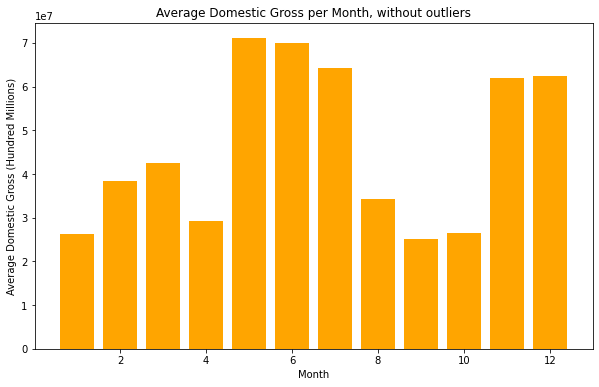

In [94]:
# stacked bar plot with month released domestic and foreign gross


month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_gross'].mean(skipna=True) for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses1, color='orange')   
ax.set_title('Average Domestic Gross per Month, without outliers')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [89]:
# Measure the highest differences between worldwide and domestic gross (international appeal)

In [ ]:
# Differences in STUDIO mean gross per year

In [ ]:
# percent of subscribers that watch new content provided by a streaming service

In [ ]:
# comparing streaming services with multiple figs